In [134]:
#profitableHospital-project

In [135]:
#dependencies
import pandas as pd

import requests
import json
from config import gkey

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import tensorflow
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import joblib

In [136]:
#initial file read
df = pd.read_csv("Medicare_Hospital_Cost_Report_PUF_2017.csv")
#df = df.dropna(axis='columns', how='all')
#df = df.dropna()
df.head()

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges,rpt_rec_num
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,MARSHALL,48540.0,U,STH,...,4492364.0,2638799.0,NaN,2638799.0,0.453498,1237912.0,4026663.0,NaN,NaN,599181
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,RICHMOND,99934.0,R,STH,...,31174.0,-1114660.0,NaN,-1114660.0,0.173114,391215.0,4981119.0,NaN,NaN,601095
2,450178,PECOS COUNTY MEMORIAL HOSPITAL,386 W IH-10,FORT STOCKTON,TX,79735,PECOS,99945.0,R,STH,...,2096862.0,576278.0,NaN,576278.0,0.455741,719760.0,1275211.0,NaN,NaN,601392
3,341317,PIONEER HLTH SERV OF STOKES CNTY,1570 NC & 89 HWY,DANBURY,NC,27016,STOKES,49180.0,U,CAH,...,1542201.0,640268.0,622592.0,17676.0,1.154767,578366.0,801800.0,159516.0,702117.0,601721
4,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,WARE,99911.0,R,STH,...,224757.0,-6170184.0,NaN,-6170184.0,0.271734,3113423.0,11231324.0,1331.0,8211.0,603846


In [137]:
conTable = pd.read_csv("certificateofneedstatesTable.csv")
conTable.head()

,State Code,CON
0,AK,1
1,AL,1
2,AR,1
3,AZ,0
4,CA,0


In [138]:
urbanTable = pd.read_csv("ruralversusurbanTable.csv")
urbanTable.head()

,Rural Versus Urban,Urban
0,U,1
1,R,2


In [139]:
mainFile1 = pd.merge(df, conTable, how= "left", on=['State Code'])
mainFile1.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges,rpt_rec_num,CON
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,MARSHALL,48540.0,U,STH,...,2638799.0,NaN,2638799.0,0.453498,1237912.0,4026663.0,NaN,NaN,599181,1.0
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,RICHMOND,99934.0,R,STH,...,-1114660.0,NaN,-1114660.0,0.173114,391215.0,4981119.0,NaN,NaN,601095,1.0
2,450178,PECOS COUNTY MEMORIAL HOSPITAL,386 W IH-10,FORT STOCKTON,TX,79735,PECOS,99945.0,R,STH,...,576278.0,NaN,576278.0,0.455741,719760.0,1275211.0,NaN,NaN,601392,0.0
3,341317,PIONEER HLTH SERV OF STOKES CNTY,1570 NC & 89 HWY,DANBURY,NC,27016,STOKES,49180.0,U,CAH,...,640268.0,622592.0,17676.0,1.154767,578366.0,801800.0,159516.0,702117.0,601721,1.0
4,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,WARE,99911.0,R,STH,...,-6170184.0,NaN,-6170184.0,0.271734,3113423.0,11231324.0,1331.0,8211.0,603846,1.0


In [140]:
mainFile2 = pd.merge(mainFile1, urbanTable, how= "left", on=['Rural Versus Urban'])
mainFile2.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges,rpt_rec_num,CON,Urban
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,MARSHALL,48540.0,U,STH,...,NaN,2638799.0,0.453498,1237912.0,4026663.0,NaN,NaN,599181,1.0,1.0
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,RICHMOND,99934.0,R,STH,...,NaN,-1114660.0,0.173114,391215.0,4981119.0,NaN,NaN,601095,1.0,2.0
2,450178,PECOS COUNTY MEMORIAL HOSPITAL,386 W IH-10,FORT STOCKTON,TX,79735,PECOS,99945.0,R,STH,...,NaN,576278.0,0.455741,719760.0,1275211.0,NaN,NaN,601392,0.0,2.0
3,341317,PIONEER HLTH SERV OF STOKES CNTY,1570 NC & 89 HWY,DANBURY,NC,27016,STOKES,49180.0,U,CAH,...,622592.0,17676.0,1.154767,578366.0,801800.0,159516.0,702117.0,601721,1.0,1.0
4,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,WARE,99911.0,R,STH,...,NaN,-6170184.0,0.271734,3113423.0,11231324.0,1331.0,8211.0,603846,1.0,2.0


In [141]:
#Append lattitude and longitude using google maps api

In [142]:
#Append calculated field profit percent to file
profit = mainFile2["Net Income"]/mainFile2["Gross Revenue"]
mainFile2["Profit %"] = profit
#mainFile2.head()

In [143]:
#Append calculated field inpatient percent
inpatient = mainFile2["Inpatient Revenue"]/mainFile2["Gross Revenue"]
mainFile2["Inpatient %"] = inpatient
#mainFile2.head()

In [144]:
#Append calculated field outpatient percent
outpatient = mainFile2["Outpatient Revenue"]/mainFile2["Gross Revenue"]
mainFile2["Outpatient %"] = outpatient
#mainFile2.head()

In [145]:
#Append calculated field charity percent
charity = mainFile2["Cost of Charity Care"]/mainFile2["Gross Revenue"]
mainFile2["Charity %"] = charity
#mainFile2.head()

In [146]:
#Is there a way to replace blank lines with 0?

In [147]:
#Append calculated field uncompensated percent
uncompensated = mainFile2["Cost of Uncompensated Care"]/mainFile2["Gross Revenue"]
mainFile2["Uncompensated %"] = charity
#mainFile2.head()

In [148]:
#Is there a way to replace blank lines with 0?

In [149]:
mainFile2 = mainFile2.rename(columns={"Total Discharges (V + XVIII + XIX + Unknown)":"Discharges"})

In [150]:
#Append calculated field revenue per discharge
revdischarge = mainFile2["Gross Revenue"]/mainFile2["Discharges"]
mainFile2["Rev Per Discharge"] = revdischarge
#mainFile2.head()

In [151]:
#Append calculated field revenue per discharge
revbed = mainFile2["Gross Revenue"]/mainFile2["Number of Beds"]
mainFile2["Rev Per Bed"] = revbed
#mainFile2.head()

In [152]:
#Append calculated field discharges per bed
volbed = mainFile2["Discharges"]/mainFile2["Number of Beds"]
mainFile2["Discharges Per Bed"] = volbed
#mainFile2.head()

In [208]:
#Append calculated field revs per fte
revfte = mainFile2["Gross Revenue"]/mainFile2["FTE - Employees on Payroll"]
mainFile2["Rev Per FTE"] = revfte
#mainFile2.head()

In [209]:
bins = [-100, -.006687, .032615, 100]
group_names = ["3", "2", "1"]

In [210]:
mainFile2["Profit Score"] = pd.cut(mainFile2["Profit %"], bins, labels=group_names, include_lowest=True)
mainFile2.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Profit %,Inpatient %,Outpatient %,Charity %,Uncompensated %,Rev Per Discharge,Rev Per Bed,Discharges Per Bed,Profit Score,Rev Per FTE
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,MARSHALL,48540.0,U,STH,...,0.122992,0.311881,0.688119,0.001229,0.001229,49321.986207,3.065009e+05,6.214286,1,66609.947221
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,RICHMOND,99934.0,R,STH,...,-0.048746,0.325730,0.674270,0.000156,0.000156,116666.290816,3.572905e+05,3.062500,3,839449.082232
2,450178,PECOS COUNTY MEMORIAL HOSPITAL,386 W IH-10,FORT STOCKTON,TX,79735,PECOS,99945.0,R,STH,...,0.068136,0.240965,0.759035,NaN,NaN,81325.096154,3.383124e+05,4.160000,1,56699.135215
3,341317,PIONEER HLTH SERV OF STOKES CNTY,1570 NC & 89 HWY,DANBURY,NC,27016,STOKES,49180.0,U,CAH,...,0.002345,0.275801,0.724199,NaN,NaN,144950.480769,3.014970e+05,2.080000,2,67196.442899
4,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,WARE,99911.0,R,STH,...,-0.037184,0.391293,0.608707,0.004715,0.004715,78642.209479,1.070549e+06,13.612903,3,179702.034893


In [211]:
mainFile2['Profit Score'].value_counts()

2    2529
1    1729
3    1630
Name: Profit Score, dtype: int64

In [212]:
#Targeting the dataset on columns (metrics) important to effort
mainFile3 = mainFile2[['Profit Score','Profit %','CON', 'Urban','Provider Type','Type of Control','FTE - Employees on Payroll', 'Number of Beds','Discharges','Cost of Charity Care','Cost of Uncompensated Care','Total Costs', 'Total fixed Assets', 'Total Long Term Liabilities', 'Inpatient Revenue', 'Outpatient Revenue', 'Gross Revenue', 'Inpatient %', 'Outpatient %', 'Charity %', 'Uncompensated %', 'Rev Per Discharge' , 'Rev Per Bed', 'Discharges Per Bed','Rev Per FTE']]
mainFile3.head()
#Excluded Wage Related costs because the high number of unavailable metrics

,Profit Score,Profit %,CON,Urban,Provider Type,Type of Control,FTE - Employees on Payroll,Number of Beds,Discharges,Cost of Charity Care,...,Outpatient Revenue,Gross Revenue,Inpatient %,Outpatient %,Charity %,Uncompensated %,Rev Per Discharge,Rev Per Bed,Discharges Per Bed,Rev Per FTE
0,1,0.122992,1.0,1.0,1,2,322.10,70.0,435.0,26358.0,...,14763631.0,21455064.0,0.311881,0.688119,0.001229,0.001229,49321.986207,3.065009e+05,6.214286,66609.947221
1,3,-0.048746,1.0,2.0,1,4,27.24,64.0,196.0,3556.0,...,15418247.0,22866593.0,0.325730,0.674270,0.000156,0.000156,116666.290816,3.572905e+05,3.062500,839449.082232
2,1,0.068136,0.0,2.0,1,10,149.17,25.0,104.0,NaN,...,6419770.0,8457810.0,0.240965,0.759035,NaN,NaN,81325.096154,3.383124e+05,4.160000,56699.135215
3,2,0.002345,1.0,1.0,1,4,112.17,25.0,52.0,NaN,...,5458594.0,7537425.0,0.275801,0.724199,NaN,NaN,144950.480769,3.014970e+05,2.080000,67196.442899
4,3,-0.037184,1.0,2.0,1,9,923.39,155.0,2110.0,782377.0,...,101005874.0,165935062.0,0.391293,0.608707,0.004715,0.004715,78642.209479,1.070549e+06,13.612903,179702.034893


In [213]:
# Identify incomplete rows
mainFile3.count()

Profit Score                   5888
Profit %                       5888
CON                            6168
Urban                          6090
Provider Type                  6171
Type of Control                6171
FTE - Employees on Payroll     6063
Number of Beds                 6085
Discharges                     6077
Cost of Charity Care           4376
Cost of Uncompensated Care     4707
Total Costs                    6090
Total fixed Assets             5812
Total Long Term Liabilities    4963
Inpatient Revenue              5889
Outpatient Revenue             5386
Gross Revenue                  5893
Inpatient %                    5889
Outpatient %                   5386
Charity %                      4323
Uncompensated %                4323
Rev Per Discharge              5880
Rev Per Bed                    5889
Discharges Per Bed             6076
Rev Per FTE                    5871
dtype: int64

In [214]:
# Drop all rows with missing information
mainFile4 = mainFile3.dropna(how='any')

In [215]:
# Identify incomplete rows
mainFile4.count()

Profit Score                   3816
Profit %                       3816
CON                            3816
Urban                          3816
Provider Type                  3816
Type of Control                3816
FTE - Employees on Payroll     3816
Number of Beds                 3816
Discharges                     3816
Cost of Charity Care           3816
Cost of Uncompensated Care     3816
Total Costs                    3816
Total fixed Assets             3816
Total Long Term Liabilities    3816
Inpatient Revenue              3816
Outpatient Revenue             3816
Gross Revenue                  3816
Inpatient %                    3816
Outpatient %                   3816
Charity %                      3816
Uncompensated %                3816
Rev Per Discharge              3816
Rev Per Bed                    3816
Discharges Per Bed             3816
Rev Per FTE                    3816
dtype: int64

In [217]:
#Output geocoded file to eliminate multiple hits on googlemaps
mainFile4.to_csv("2017targetedmain.csv", index=False, header=True)

In [236]:
# Select features to be used as x values
features1 = mainFile4[['CON', 'Urban','Provider Type','Type of Control','FTE - Employees on Payroll', 'Number of Beds','Discharges','Cost of Charity Care','Cost of Uncompensated Care','Total Costs', 'Total fixed Assets', 'Total Long Term Liabilities', 'Inpatient Revenue', 'Outpatient Revenue', 'Gross Revenue', 'Inpatient %', 'Outpatient %', 'Charity %', 'Uncompensated %', 'Rev Per Discharge', 'Rev Per Bed', 'Discharges Per Bed', 'Rev Per Bed']]
features1.head()

,CON,Urban,Provider Type,Type of Control,FTE - Employees on Payroll,Number of Beds,Discharges,Cost of Charity Care,Cost of Uncompensated Care,Total Costs,...,Outpatient Revenue,Gross Revenue,Inpatient %,Outpatient %,Charity %,Uncompensated %,Rev Per Discharge,Rev Per Bed,Discharges Per Bed,Rev Per Bed
0,1.0,1.0,1,2,322.10,70.0,435.0,26358.0,284986.0,7704339.0,...,14763631.0,21455064.0,0.311881,0.688119,0.001229,0.001229,49321.986207,3.065009e+05,6.214286,3.065009e+05
4,1.0,2.0,1,9,923.39,155.0,2110.0,782377.0,3793100.0,39198497.0,...,101005874.0,165935062.0,0.391293,0.608707,0.004715,0.004715,78642.209479,1.070549e+06,13.612903,1.070549e+06
6,1.0,2.0,1,2,378.26,49.0,632.0,14670.0,269451.0,20033059.0,...,44004253.0,60856429.0,0.276917,0.723083,0.000241,0.000241,96291.818038,1.241968e+06,12.897959,1.241968e+06
7,1.0,1.0,1,2,693.11,48.0,1422.0,1989303.0,1882929.0,43205601.0,...,74054548.0,113478041.0,0.347411,0.652589,0.017530,0.017530,79801.716596,2.364126e+06,29.625000,2.364126e+06
8,1.0,1.0,1,2,1452.05,268.0,9188.0,9740925.0,15188401.0,222474406.0,...,625072412.0,983465760.0,0.364419,0.635581,0.009905,0.009905,107038.067044,3.669648e+06,34.283582,3.669648e+06


In [237]:
#Output features file as a reference document
features1.to_csv("2017featuresforRFE.csv", index=False, header=True)

In [238]:
# Identify the outcome column/data
# yy = mainFile4[['Profit %']]
# yy.head()

In [239]:
# yy.describe()

In [240]:
# Identify the outcome column/data
y = mainFile4[['Profit Score']]
y.head()

,Profit Score
0,1
4,3
6,3
7,3
8,2


In [241]:
y.describe()

,Profit Score
count,3816
unique,3
top,2
freq,1908


In [242]:
y.shape

(3816, 1)

In [243]:
X = features1
X.shape

(3816, 23)

In [244]:
#Create a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [245]:
y_train.shape

(2862, 1)

In [246]:
X_train.shape

(2862, 23)

In [247]:
y_test.shape

(954, 1)

In [248]:
X_test.shape

(954, 23)

In [249]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [250]:
#Identify features to create a more efficient model with
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train_scaled, y_train)

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [251]:
selector.support_

array([False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False])

In [252]:
selector.ranking_

array([16, 19, 18, 17, 15,  6,  1, 12,  7,  5,  1,  1, 13,  1,  3, 14,  9,
       11,  4, 10,  1,  2,  8])

In [253]:
# Select features to be used as x values
# features2 = mainFile4[['Number of Beds','Total Discharges (V + XVIII + XIX + Unknown)','Outpatient Revenue', 'Gross Revenue', 'Total Costs', 'Charity %', 'Uncompensated %']]
# features2.head()

In [199]:
# y = mainFile4[['Profit Score']]

In [200]:
# y.shape

In [201]:
# X = features2

In [202]:
# x.shape

In [203]:
#Create a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, random_state=1)

In [204]:
# y_train.shape

In [205]:
# X_train.shape

In [206]:
#Create the linear regression model and fit to the training data
modela = LinearRegression()
modela.fit(X_train_scaled, y_train)
score = modela.score(X_train_scaled, y_train)
print(f"Training Data Score: {modela.score(X_train_scaled, y_train)}")

Training Data Score: 0.0820797088731966


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [207]:
#Run the model with the testing data and determine score
print(f"Testing Data Score: {modela.score(X_test_scaled, y_test)}")

Testing Data Score: 0.06281307822380788


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


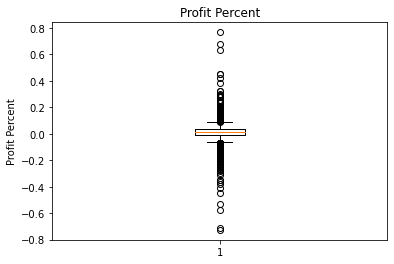

In [189]:
chartdata = mainFile4['Profit %']
fig1, ax1 = plt.subplots()
ax1.set_title('Profit Percent')
ax1.set_ylabel('Profit Percent')
ax1.boxplot(chartdata)
plt.show()

In [190]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = chartdata.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of profit percent is: {lowerq}")
print(f"The upper quartile of profit percent is: {upperq}")
print(f"The interquartile range of profit percent is: {iqr}")
print(f"The the median of profit percent is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of profit percent is: -0.006687670030328295
The upper quartile of profit percent is: 0.0326153159343342
The interquartile range of profit percent is: 0.039302985964662494
The the median of profit percent is: 0.012185286197695353 
Values below -0.06564214897732204 could be outliers.
Values above 0.09156979488132794 could be outliers.
